In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import re
import string
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kaggle\input\Sentiment analysis - amazon\Musical_instruments_reviews.csv')

# Dataset analysis

In [3]:
data.head(15)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


NaN values

In [5]:
data.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10227 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10227 non-null  object 
 1   asin            10227 non-null  object 
 2   reviewerName    10227 non-null  object 
 3   helpful         10227 non-null  object 
 4   reviewText      10227 non-null  object 
 5   overall         10227 non-null  float64
 6   summary         10227 non-null  object 
 7   unixReviewTime  10227 non-null  int64  
 8   reviewTime      10227 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 799.0+ KB


Overall

In [7]:
data.describe()

,overall,unixReviewTime
count,10227.000000,1.022700e+04
mean,4.488413,1.360531e+09
std,0.894568,3.778250e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343347e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388923e+09
max,5.000000,1.405987e+09


In [8]:
data['overall'].value_counts()

5.0    6912
4.0    2079
3.0     771
2.0     249
1.0     216
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

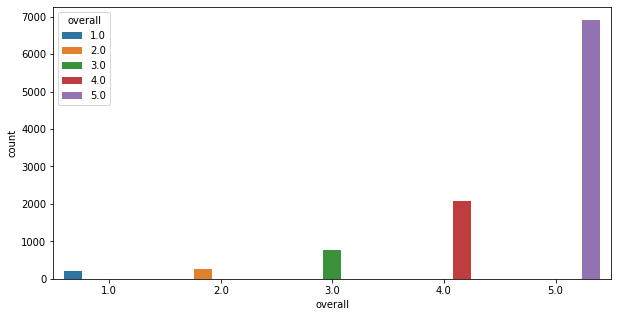

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='overall', hue='overall')

Joining "reviewText" and "Summary"

In [10]:
data['reviewText'] = data['reviewText'].str.cat(data["summary"], sep=' ')

WordCloud - basic

In [11]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
def show_wordcloud(df ,new_stopwords=[],save_name=None):
    stopwords = set(STOPWORDS)
    stopwords.update(new_stopwords)
    text = ''.join(review for review in df)
    wordcloud = WordCloud(stopwords=stopwords).generate(text)
    plt.figure(figsize = (15,30))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if save_name:
        plt.savefig(save_name+'.png')
    plt.show()

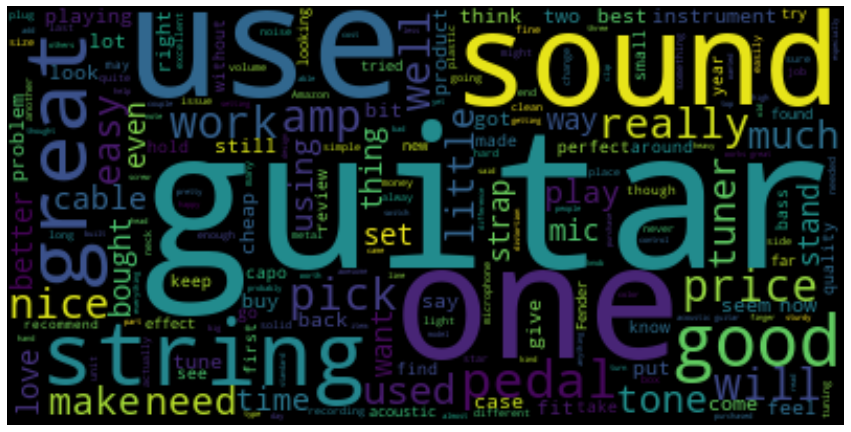

In [12]:
show_wordcloud(df=data.reviewText)

Splitting on the basis of sentiment

In [13]:
def check_sentiment(x):
    sentiment = None
    if x > 3:
        sentiment = 1
    elif x == 3:
        sentiment = 0
    else:
        sentiment = -1
    return sentiment
    
data['sentiment'] = data['overall'].apply(lambda x: check_sentiment(x))

In [14]:
data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",1
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",1
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",1
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",0
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",1
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",1


In [15]:
data['sentiment'].value_counts()

 1    8991
 0     771
-1     465
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

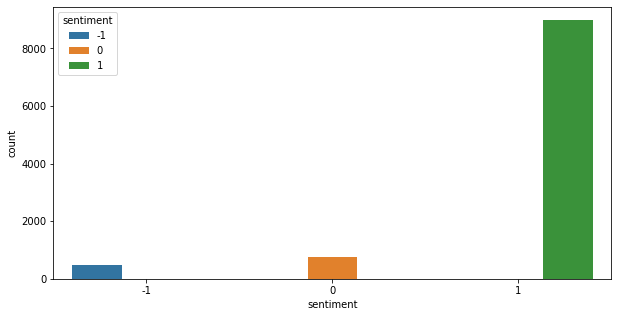

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='sentiment', hue='sentiment')

WordCloud - Sentiment

In [17]:
positive = data[data['sentiment'] == 1]
neutral = data[data['sentiment'] == 0]
negative = data[data['sentiment'] == -1]

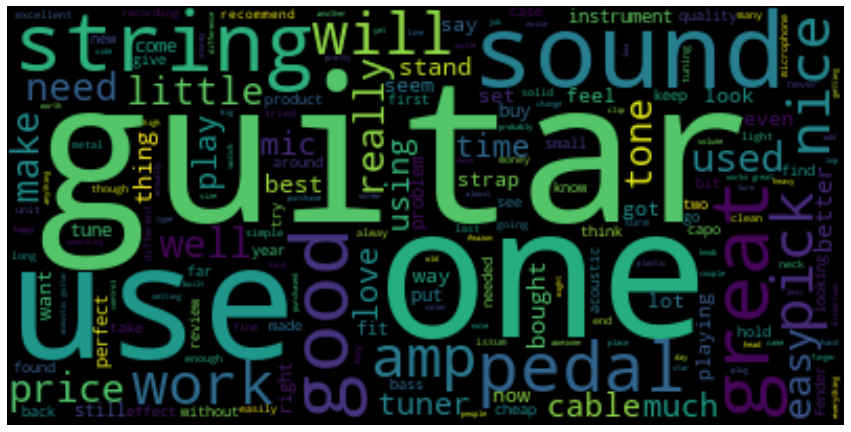

In [18]:
show_wordcloud(df=positive.reviewText)

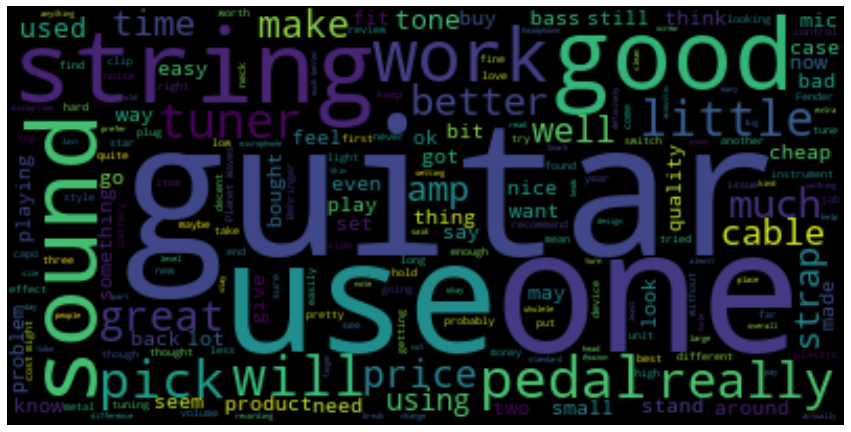

In [19]:
show_wordcloud(df=neutral.reviewText)

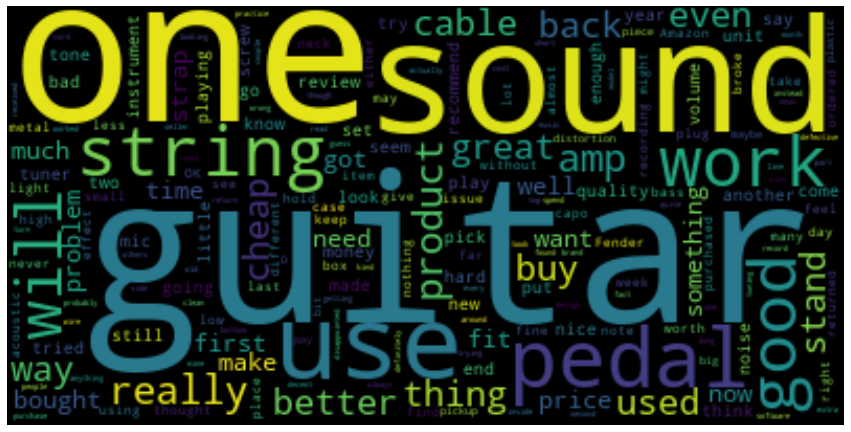

In [20]:
show_wordcloud(df=negative.reviewText)

# Data cleaning

Characters cleaning

In [21]:
def clean_characters(text: str):
    non_digit = [single_char for single_char in text if single_char.isdigit() == False]
    non_punctuation = [single_char for single_char in text if single_char not in string.punctuation]
    new_sentence = ''.join(non_punctuation)
    return new_sentence
    
data['text_clear'] = data['reviewText'].apply(lambda x: clean_characters(x))

Words cleaning 

In [22]:
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
# or from nltk.stem import PorterStemmer 


def clean_words(text:str, add_stopwords = None, del_stopwords_punctuation=False):
    #tokenization
    splited = re.split('\W+', text)
    #stopwords
    new_stopwords=[]
    
    if del_stopwords_punctuation:
        for word in stopwords:
            new_stopwords.append(''.join([single_char for single_char in word if single_char not in string.punctuation]))
    else:
        new_stopwords = stopwords
    if add_stopwords:
        new_stopwords += add_stopwords
    clean_words = [word for word in splited if word.lower() not in new_stopwords]
    lemmatizer = WordNetLemmatizer()
    clean_words = [lemmatizer.lemmatize(word) for word in clean_words]
    return clean_words
                             
data['text_clear_tokenized'] = data['text_clear'].apply(str).apply(lambda x: clean_words(text=x, del_stopwords_punctuation=True))

In [23]:
data.head(15)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,text_clear,text_clear_tokenized
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",1,Not much to write about here but it does exact...,"[much, write, exactly, supposed, filter, pop, ..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",1,The product does exactly as it should and is q...,"[product, exactly, quite, affordableI, realize..."
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",1,The primary job of this device is to block the...,"[primary, job, device, block, breath, would, o..."
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1,Nice windscreen protects my MXL mic and preven...,"[Nice, windscreen, protects, MXL, mic, prevent..."
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",1,This pop filter is great It looks and performs...,"[pop, filter, great, look, performs, like, stu..."
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",1,So good that I bought another one Love the he...,"[good, bought, another, one, Love, heavy, cord..."
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",1,I have used monster cables for years and with ...,"[used, monster, cable, year, good, reason, lif..."
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",0,I now use this cable to run from the output of...,"[use, cable, run, output, pedal, chain, input,..."
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",1,Perfect for my Epiphone Sheraton II Monster c...,"[Perfect, Epiphone, Sheraton, II, Monster, cab..."
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",1,Monster makes the best cables and a lifetime w...,"[Monster, make, best, cable, lifetime, warrant..."


# Count Vectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_matrix = vectorizer.fit_transform(data.text_clear_tokenized.str.join(' '))

In [25]:
print('Number of words:', len(vectorizer.get_feature_names()))

Number of words: 30763


In [26]:
def words_count(vect, x, n):
    sum_words = x.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
words_count(vectorizer, data_matrix, 15)

[('guitar', 7224),
 ('great', 5880),
 ('one', 4913),
 ('good', 4851),
 ('string', 4772),
 ('sound', 4752),
 ('like', 4081),
 ('use', 3887),
 ('pedal', 3866),
 ('well', 3252),
 ('work', 3097),
 ('get', 3001),
 ('price', 2699),
 ('amp', 2507),
 ('pick', 2452)]

# Model Bulding

Dataset separation

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_matrix, data.sentiment, test_size=0.2, random_state=42)

Model evaluation function

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [30]:
import time
def model_evaluation(classifiers, x, y, cv_num=10, scoring='f1'):
    results = {}
    for clf in classifiers:
        start_time = time.time()
        clf.fit(x, y)
        scores = cross_val_score(clf, x, y, scoring=scoring, cv=cv_num)
        print(f'{clf.__class__.__name__}\n\n')
        print('Results:')
        for num, score in enumerate(scores):
            print(f'Estimation {num}: {round(score, 3)}')
        print(f'\nMean score: {round(scores.mean(), 3)}')
        print(f'Standard deviation: {round(scores.std(), 3)}\n')
        y_pred = cross_val_predict(clf, x, y)
        print(f'Confusion matrix:\n{confusion_matrix(y, y_pred)}\n')
        results[clf.__class__.__name__] = [str(round(scores.mean(), 3)*100)+'%', str(round(time.time() - start_time, 0))+'s']
        print('\nClassification report:\n\n', classification_report(y, y_pred))
        print(f'\n\nProcess time: {round(time.time() - start_time, 2)}s')
    return results

Model selection

In [31]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_depth=25)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [34]:
model_evaluation([softmax_reg, rnd_clf, knn_clf], X_train, y_train, scoring='f1_micro')

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression


Results:
Estimation 0: 0.862
Estimation 1: 0.859
Estimation 2: 0.87
Estimation 3: 0.859
Estimation 4: 0.861
Estimation 5: 0.866
Estimation 6: 0.852
Estimation 7: 0.847
Estimation 8: 0.846
Estimation 9: 0.868

Mean score: 0.859
Standard deviation: 0.008



c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Confusion matrix:
[[  92   76  220]
 [  54  149  423]
 [  97  304 6766]]


Classification report:

               precision    recall  f1-score   support

          -1       0.38      0.24      0.29       388
           0       0.28      0.24      0.26       626
           1       0.91      0.94      0.93      7167

    accuracy                           0.86      8181
   macro avg       0.52      0.47      0.49      8181
weighted avg       0.84      0.86      0.85      8181



Process time: 19.71s
RandomForestClassifier


Results:
Estimation 0: 0.875
Estimation 1: 0.877
Estimation 2: 0.877
Estimation 3: 0.877
Estimation 4: 0.877
Estimation 5: 0.877
Estimation 6: 0.877
Estimation 7: 0.875
Estimation 8: 0.875
Estimation 9: 0.875

Mean score: 0.876
Standard deviation: 0.001

Confusion matrix:
[[   0    0  388]
 [   0    0  626]
 [   0    0 7167]]


Classification report:

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       388
       

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier


Results:
Estimation 0: 0.875
Estimation 1: 0.877
Estimation 2: 0.875
Estimation 3: 0.877
Estimation 4: 0.879
Estimation 5: 0.877
Estimation 6: 0.873
Estimation 7: 0.875
Estimation 8: 0.873
Estimation 9: 0.877

Mean score: 0.876
Standard deviation: 0.002

Confusion matrix:
[[   2    3  383]
 [   1    5  620]
 [   4   11 7152]]


Classification report:

               precision    recall  f1-score   support

          -1       0.29      0.01      0.01       388
           0       0.26      0.01      0.02       626
           1       0.88      1.00      0.93      7167

    accuracy                           0.88      8181
   macro avg       0.48      0.34      0.32      8181
weighted avg       0.80      0.88      0.82      8181



Process time: 5.14s


{'LogisticRegression': ['85.9%', '20.0s'],
 'RandomForestClassifier': ['87.6%', '51.0s'],
 'KNeighborsClassifier': ['87.6%', '5.0s']}

## KNeighbors Classifier

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_params={'n_neighbors': [8,9,10,11,12],
            'weights': ['uniform', 'distance'],
            'metric': ['eculidean', 'manhattan']}
knn_clf_cv = GridSearchCV(knn_clf, grid_params, verbose=1,cv=3, n_jobs=-1)
knn_clf_cv.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.5s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eculidean', 'manhattan'],
                         'n_neighbors': [8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [37]:
knn_clf_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [38]:
print('Classification report:\n\n', classification_report(y_test, knn_clf_cv.predict(X_test)))

Classification report:

               precision    recall  f1-score   support

          -1       1.00      0.01      0.03        77
           0       0.00      0.00      0.00       145
           1       0.89      1.00      0.94      1824

    accuracy                           0.89      2046
   macro avg       0.63      0.34      0.32      2046
weighted avg       0.83      0.89      0.84      2046



In [39]:
confusion_matrix(y_test, knn_clf_cv.predict(X_test))

array([[   1,    1,   75],
       [   0,    0,  145],
       [   0,    0, 1824]], dtype=int64)

In [40]:
print('F1 score:', round(f1_score(y_test, knn_clf_cv.predict(X_test), average='weighted')*100, 3), '%')

F1 score: 84.176 %


The model has pretty good accuracy, but only in positive examples. The precision and recall of the neutral and negative examples are very low.

## Softmax Regression

In [41]:
grid_params = {'C': np.logspace(-2, 2, 50),
             'penalty':['l1', 'l2']}

softmax_reg_cv = GridSearchCV(softmax_reg, grid_params, verbose=0,cv=5, n_jobs=-1)
softmax_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10, multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-0...
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2']})

In [42]:
softmax_reg_cv.best_params_

{'C': 0.021209508879201904, 'penalty': 'l2'}

In [43]:
print('Classification report:\n\n', classification_report(y_test, softmax_reg_cv.predict(X_test)))

Classification report:

               precision    recall  f1-score   support

          -1       0.62      0.10      0.18        77
           0       0.43      0.11      0.18       145
           1       0.90      0.99      0.95      1824

    accuracy                           0.89      2046
   macro avg       0.65      0.40      0.43      2046
weighted avg       0.86      0.89      0.86      2046



In [44]:
confusion_matrix(y_test, softmax_reg_cv.predict(X_test))

array([[   8,    6,   63],
       [   1,   16,  128],
       [   4,   15, 1805]], dtype=int64)

In [45]:
print('F1 score:', round(f1_score(y_test, softmax_reg_cv.predict(X_test), average='weighted')*100, 3), '%')

F1 score: 86.164 %


This model has better precision and recall than the KNeighbors classifier, but it is still too low.

## Synthetic Minority Oversampling Technique

In [46]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [47]:
Counter(data.sentiment)

Counter({1: 8991, 0: 771, -1: 465})

In [48]:
oversample = SMOTE()
X_os, y_os = oversample.fit_resample(data_matrix, data.sentiment)

In [49]:
Counter(y_os)

Counter({1: 8991, 0: 8991, -1: 8991})

Dataset separation

In [50]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

Model evaluation

In [51]:
model_evaluation([softmax_reg, rnd_clf, knn_clf], X_train_os, y_train_os, scoring='f1_micro')

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression


Results:
Estimation 0: 0.83
Estimation 1: 0.824
Estimation 2: 0.837
Estimation 3: 0.831
Estimation 4: 0.828
Estimation 5: 0.84
Estimation 6: 0.83
Estimation 7: 0.836
Estimation 8: 0.833
Estimation 9: 0.828

Mean score: 0.832
Standard deviation: 0.005



c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Confusion matrix:
[[6353  688  156]
 [1525 5308  362]
 [ 306  678 6202]]


Classification report:

               precision    recall  f1-score   support

          -1       0.78      0.88      0.83      7197
           0       0.80      0.74      0.77      7195
           1       0.92      0.86      0.89      7186

    accuracy                           0.83     21578
   macro avg       0.83      0.83      0.83     21578
weighted avg       0.83      0.83      0.83     21578



Process time: 30.61s
RandomForestClassifier


Results:
Estimation 0: 0.777
Estimation 1: 0.783
Estimation 2: 0.768
Estimation 3: 0.777
Estimation 4: 0.756
Estimation 5: 0.78
Estimation 6: 0.775
Estimation 7: 0.785
Estimation 8: 0.766
Estimation 9: 0.76

Mean score: 0.773
Standard deviation: 0.009

Confusion matrix:
[[6413  458  326]
 [2907 3577  711]
 [ 237  260 6689]]


Classification report:

               precision    recall  f1-score   support

          -1       0.67      0.89      0.77      7197
         

{'LogisticRegression': ['83.2%', '31.0s'],
 'RandomForestClassifier': ['77.3%', '138.0s'],
 'KNeighborsClassifier': ['59.0%', '35.0s']}

In [52]:
softmax_reg_cv.fit(X_train_os, y_train_os)

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10, multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-0...
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2']})

In [53]:
softmax_reg_cv.best_params_

{'C': 82.86427728546842, 'penalty': 'l2'}

In [54]:
print('Classification report:\n\n', classification_report(y_test_os, softmax_reg_cv.predict(X_test_os)))

Classification report:

               precision    recall  f1-score   support

          -1       0.78      0.89      0.83      1794
           0       0.80      0.73      0.77      1796
           1       0.93      0.87      0.90      1805

    accuracy                           0.83      5395
   macro avg       0.84      0.83      0.83      5395
weighted avg       0.84      0.83      0.83      5395



In [55]:
confusion_matrix(y_test_os, softmax_reg_cv.predict(X_test_os))

array([[1604,  153,   37],
       [ 390, 1318,   88],
       [  62,  167, 1576]], dtype=int64)

In [56]:
print('F1 score:', round(f1_score(y_test_os, softmax_reg_cv.predict(X_test_os), average='weighted')*100, 3), '%')

F1 score: 83.341 %


Results are much better. A good idea for score increase can be another kind of vectorizer.

## TF-IDF Vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_2 = TfidfVectorizer()

In [58]:
data_matrix_tfidf = vectorizer_2.fit_transform(data.text_clear_tokenized.str.join(' '))

SMOTE

In [59]:
X_os_tfidf, y_os_tfidf = oversample.fit_resample(data_matrix_tfidf, data.sentiment)

Dataset separation

In [60]:
X_train_os_tfidf, X_test_os_tfidf, y_train_os_tfidf, y_test_os_tfidf = train_test_split(X_os_tfidf, y_os_tfidf, test_size=0.2, random_state=42)

Model evaluation

In [61]:
model_evaluation([softmax_reg, rnd_clf, knn_clf], X_train_os_tfidf, y_train_os_tfidf, scoring='f1_micro')

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression


Results:
Estimation 0: 0.981
Estimation 1: 0.97
Estimation 2: 0.972
Estimation 3: 0.966
Estimation 4: 0.981
Estimation 5: 0.973
Estimation 6: 0.973
Estimation 7: 0.973
Estimation 8: 0.973
Estimation 9: 0.974

Mean score: 0.974
Standard deviation: 0.004



c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Confusion matrix:
[[7197    0    0]
 [   4 7182    9]
 [ 162  442 6582]]


Classification report:

               precision    recall  f1-score   support

          -1       0.98      1.00      0.99      7197
           0       0.94      1.00      0.97      7195
           1       1.00      0.92      0.96      7186

    accuracy                           0.97     21578
   macro avg       0.97      0.97      0.97     21578
weighted avg       0.97      0.97      0.97     21578



Process time: 38.01s
RandomForestClassifier


Results:
Estimation 0: 0.924
Estimation 1: 0.927
Estimation 2: 0.917
Estimation 3: 0.924
Estimation 4: 0.924
Estimation 5: 0.924
Estimation 6: 0.913
Estimation 7: 0.916
Estimation 8: 0.924
Estimation 9: 0.911

Mean score: 0.92
Standard deviation: 0.005

Confusion matrix:
[[6757    6  434]
 [   2 6285  908]
 [  48  351 6787]]


Classification report:

               precision    recall  f1-score   support

          -1       0.99      0.94      0.97      7197
        

{'LogisticRegression': ['97.39999999999999%', '38.0s'],
 'RandomForestClassifier': ['92.0%', '179.0s'],
 'KNeighborsClassifier': ['67.4%', '39.0s']}

In [62]:
softmax_reg_cv.fit(X_train_os_tfidf, y_train_os_tfidf)

c:\users\pmich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10, multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-0...
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2']})

In [63]:
softmax_reg_cv.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [64]:
print('Classification report:\n\n', classification_report(y_test_os_tfidf, softmax_reg_cv.predict(X_test_os_tfidf)))

Classification report:

               precision    recall  f1-score   support

          -1       0.98      1.00      0.99      1794
           0       0.93      1.00      0.97      1796
           1       1.00      0.91      0.95      1805

    accuracy                           0.97      5395
   macro avg       0.97      0.97      0.97      5395
weighted avg       0.97      0.97      0.97      5395



In [65]:
confusion_matrix(y_test_os_tfidf, softmax_reg_cv.predict(X_test_os_tfidf))

array([[1794,    0,    0],
       [   0, 1796,    0],
       [  33,  129, 1643]], dtype=int64)

In [66]:
print('F1 score:', round(f1_score(y_test_os_tfidf, softmax_reg_cv.predict(X_test_os_tfidf), average='weighted')*100, 3), '%')

F1 score: 96.971 %


This combination gives the best results with high precision, recall and accuracy.

# Sentiment analysis

In [67]:
def sentiment_analysis(text):
    text = clean_characters(text)
    text = clean_words(text)
    tab = data.text_clear_tokenized.str.join(' ').append(pd.Series([' '.join(text)]))
    print(f'Sample: \"{tab.iloc[-1]}\"')
    sample = vectorizer_2.transform(tab)
    prediction = softmax_reg_cv.predict(sample[-1,:])
    if prediction == 1:
        prediction = 'Positive'
    elif prediction == 0:
        prediction = 'Neutral'
    else:
        prediction = 'Negative'
    print(f'\nPrediction: {prediction}')
    probability = softmax_reg_cv.predict_proba(sample[-1,:])
    sentiment = ['Negative', 'Neutral', 'Positive']
    print("\nClass probability:")
    for num, sent in enumerate(sentiment):
        print(f'{sent}: {round(np.squeeze(probability)[num]*100, 3)} %')

A few very simple examples

In [68]:
sentiment_analysis('It was broken, slow delivery')

Sample: "broken slow delivery"

Prediction: Negative

Class probability:
Negative: 94.294 %
Neutral: 2.333 %
Positive: 3.373 %


In [69]:
sentiment_analysis('ok.')

Sample: "ok"

Prediction: Neutral

Class probability:
Negative: 0.001 %
Neutral: 99.999 %
Positive: 0.0 %


In [70]:
sentiment_analysis('The best guitar ever!')

Sample: "best guitar ever"

Prediction: Positive

Class probability:
Negative: 0.0 %
Neutral: 0.0 %
Positive: 100.0 %


The sentiment assessment in the model is based on more complex exampes with  greater number of words/sentences.